In [5]:
import pandas as pd
import pywt
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('acc_01856.csv',header=None)

In [9]:
data

,0,1,2,3,4,5
0,14,48,49,65664.0,-0.087,0.164
1,14,48,49,65703.0,-0.433,0.256
2,14,48,49,65742.0,-0.351,-0.924
3,14,48,49,65781.0,0.089,0.038
4,14,48,49,65820.0,-0.129,0.280
...,...,...,...,...,...,...
2555,14,48,49,165470.0,-2.950,0.246
2556,14,48,49,165510.0,-2.765,0.020
2557,14,48,49,165550.0,-2.009,-0.521
2558,14,48,49,165580.0,-1.072,0.117


In [11]:
h = data[4].to_numpy()
v = data[5].to_numpy()

In [13]:
x = np.sqrt(h**2 + v**2)
x.shape

(2560,)

Text(0, 0.5, 'Acceleration')

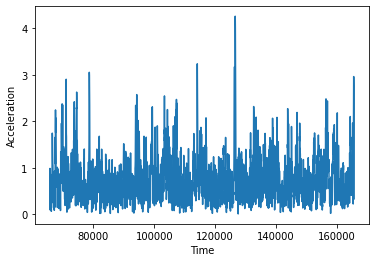

In [15]:
plt.plot(data[3].to_numpy(), x)
plt.xlabel('Time')
plt.ylabel('Acceleration')

In [17]:
wp = pywt.WaveletPacket(data=x, wavelet='db1', mode='symmetric')

In [19]:
wp.maxlevel

11

In [21]:
terminal_nodes = wp.get_leaf_nodes(True)
terminal_nodes[5].data

array([-1.03941098,  0.        ])

In [23]:
Edn = np.array([terminal_node.data[0]**2 + terminal_node.data[1]**2 for terminal_node in terminal_nodes])
print(Edn.size)

2048


In [25]:
Et = 0
for E in Edn:
    Et = Et + E

In [27]:
Pdn = []
for i in range(len(Edn)):
    Pdn.append([terminal_nodes[i].data[0] ** 2 / Edn[i] , terminal_nodes[i].data[1] ** 2 / Edn[i] ])
Pdn = np.array(Pdn)

In [29]:
print(wp.get_leaf_nodes()[5].data)

[-1.03941098  0.        ]


In [31]:
Pt = np.array([ E/Et for E in Edn])

In [33]:
def renyi_entropy(P,alpha):
    entropy = 1/(1-alpha) * np.log(np.sum(P**alpha))
    return entropy

In [35]:
def divergence(P,Q,w,alpha):
    d = renyi_entropy(((w*P)+(1-w)*Q) , alpha) - (w*renyi_entropy(P,alpha) + (1-w)*renyi_entropy(Q,alpha))
    return d

In [37]:
def stat_complexity(Q0,P,P0,w,alpha):
    sc = Q0 * divergence(P,P0,w,alpha) * renyi_entropy(P,alpha)
    return sc

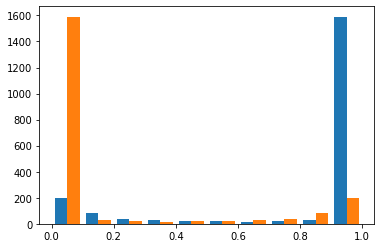

In [39]:
plt.hist(Pdn)
plt.show()

In [41]:
print(Pt)

[7.18825058e-01 1.68760036e-05 1.73666491e-04 ... 8.48748123e-06
 1.54372949e-05 1.37686513e-07]


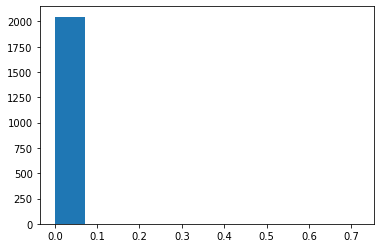

In [42]:
plt.hist(Pt)
plt.show()